### Brief preview

This notebook is intended to be a starting point for using rapaio library in a IJava jupyter notebook. We use a real simple data set. The analysis is not indended to be an example for how to conduct an inference. The line story poresented exists only to make the exemplification more friendly.

#### Set up things

First of all we have to import the library. We can do that either through maven magic or, if we have a locally compiled project source code, through jar magic. 

However we prepared an additional easier option: loading rapaio-bootstrap notebook. This is useful since this bootstrap notebook can be enriched in order to contain whatever additional configurations tailored for your needs.

In [2]:
%load rapaio-bootstrap

#### Use a data set

We load a well known small data set used in the wonderful book: *An Introduction to Statistical Learning with Applications in R, Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani*. This is the 
[book's website](http://faculty.marshall.usc.edu/gareth-james/ISL/index.html).

In [4]:
// skip the first column since it is the row number
var df = Csv.instance().skipCols.set(IntRule.from(0))
    .readUrl("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv");

Take a look at some of the data frame values.

In [5]:
df.printContent();

       TV   radio newspaper sales        TV   radio newspaper sales 
  [0] 230.1 37.8    69.2    22.1    [8]   8.6  2.1     1       4.8  
  [1]  44.5 39.3    45.1    10.4    [9] 199.8  2.6    21.2    10.6  
  [2]  17.2 45.9    69.3     9.3         ...   ...     ...     ...  
  [3] 151.5 41.3    58.5    18.5  [195]  38.2  3.7    13.8     7.6  
  [4] 180.8 10.8    58.4    12.9  [196]  94.2  4.9     8.1     9.7  
  [5]   8.7 48.9    75       7.2  [197] 177    9.3     6.4    12.8  
  [6]  57.5 32.8    23.5    11.8  [198] 283.6 42      66.2    25.5  
  [7] 120.2 19.6    11.6    13.2  [199] 232.1  8.6     8.7    13.4  



And see some statistics on the data frame.

In [6]:
df.printSummary();

Frame Summary
* rowCount: 200
* complete: 200/200
* varCount: 4
* varNames: 

0.        TV : dbl | 
1.     radio : dbl | 
2. newspaper : dbl | 
3.     sales : dbl | 

* summary: 
       TV [dbl]           radio [dbl]       newspaper [dbl]           sales [dbl]      
   Min. :   0.7000000    Min. :  0.0000000     Min. :   0.3000000    Min. :  1.6000000 
1st Qu. :  74.3750000 1st Qu. :  9.9750000  1st Qu. :  12.7500000 1st Qu. : 10.3750000 
 Median : 149.7500000  Median : 22.9000000   Median :  25.7500000  Median : 12.9000000 
   Mean : 147.0425000    Mean : 23.2640000     Mean :  30.5540000    Mean : 14.0225000 
2nd Qu. : 218.8250000 2nd Qu. : 36.5250000  2nd Qu. :  45.1000000 2nd Qu. : 17.4000000 
   Max. : 296.4000000    Max. : 49.6000000     Max. : 114.0000000    Max. : 27.0000000 
                                                                                       




#### Data exploration

Let's see how *Sales* variable visually looks like.

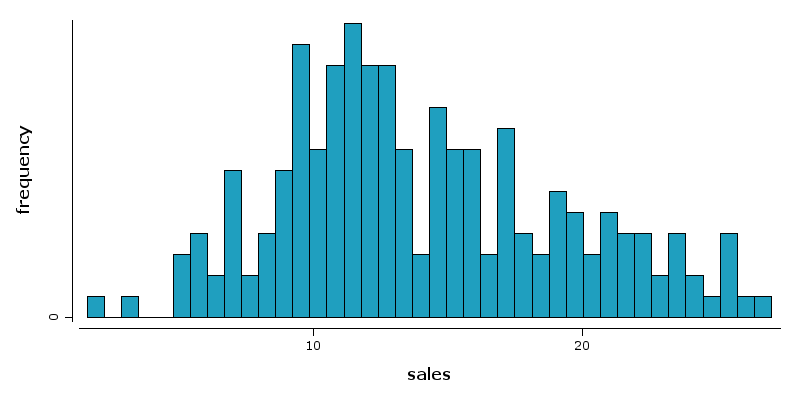

In [7]:
WS.image(hist(df.rvar("sales"), bins(40), color(6)));

Let's look at the relation between DVs and IV.

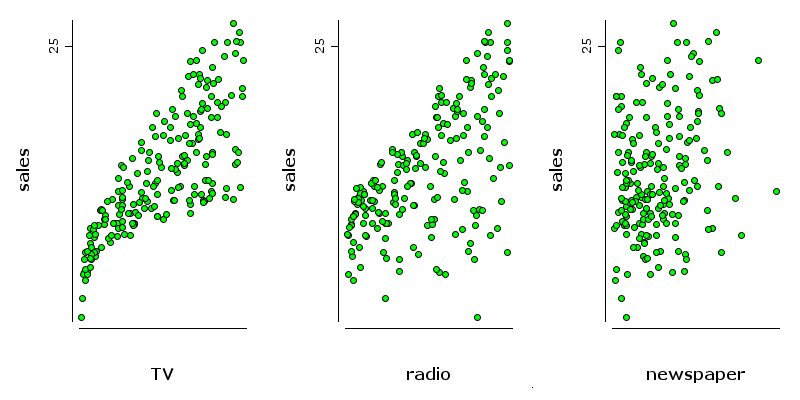

In [8]:
WS.image(gridLayer(1,3)
         .add(points(df.rvar("TV"), df.rvar("sales"), pch(2), color(3)))
         .add(points(df.rvar("radio"), df.rvar("sales"), pch(2), color(3)))
         .add(points(df.rvar("newspaper"), df.rvar("sales"), pch(2), color(3))));

We have an idea that *TV* and *radio* are correlated with *sales*. First we can check if this is true. We can do that by measuring the correlation between them.

In [9]:
CorrPearson.of(df.rvar("TV"), df.rvar("sales")).printContent();

> pearson[TV, sales] - Pearson product-moment correlation coefficient
0.7822244



In [10]:
CorrSpearman.of(df.rvar("TV"), df.rvar("sales")).printContent();

> spearman[TV, sales] - Spearman's rank correlation coefficient
0.8006144



As expected, the correlation is strong and a little bit unlinear. This is probably to be expected.

In [11]:
CorrPearson.of(df.rvar("radio"), df.rvar("sales")).printContent();

> pearson[radio, sales] - Pearson product-moment correlation coefficient
0.5762226



In [12]:
CorrSpearman.of(df.rvar("radio"), df.rvar("sales")).printContent();

> spearman[radio, sales] - Spearman's rank correlation coefficient
0.5543037



Correlation is lower, as expected from the visualization. However, it must be higher than the *newspaper*.

In [13]:
CorrPearson.of(df.rvar("newspaper"), df.rvar("sales")).printContent()

> pearson[newspaper, sales] - Pearson product-moment correlation coefficient
0.228299



#### TV and radio

It seems obvious that *TV* and *radio* dependent variables have a strong influence on sales. It becomes interesting to understand if those contributions are strongly correlated or not. If they are correlated, than our predictive power would be probably lower because the two variables would share the same information. If they are relatively independent, than our prediction would be better, since the information space would be spanned into more than one important dimension. 

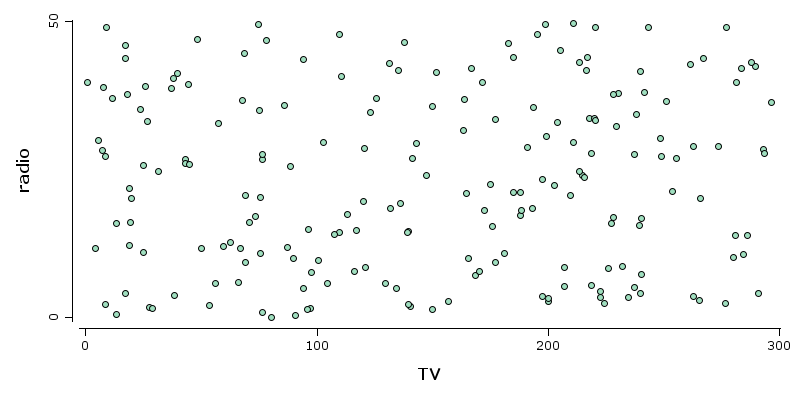

In [14]:
WS.image(points(df.rvar("TV"), df.rvar("radio"), color(23), pch(2)))

They look unrelated.

In [15]:
CorrPearson.of(df.rvar("TV"), df.rvar("radio")).printContent();
CorrSpearman.of(df.rvar("TV"), df.rvar("radio")).printContent();

> pearson[TV, radio] - Pearson product-moment correlation coefficient
0.0548087

> spearman[TV, radio] - Spearman's rank correlation coefficient
0.0561234



We were right, even Spearman's rho could not get much of it.

#### Linear regression

In [20]:
LinearRegressionModel lm = LinearRegressionModel.newModel();
lm.fit(df, "sales");
lm.predict(df, true).printSummary();

Regression predict summary
Model class: LinearRegression
Model instance: LinearRegression{}
> model is trained.
> input variables: 
1. (Intercept) dbl 
2. TV          dbl 
3. radio       dbl 
4. newspaper   dbl 
> target variables: 
1. sales dbl 

Target <<< sales >>>

> Residuals: 
       Min         1Q    Median        3Q       Max 
-8.8276871 -0.8908135 0.2418018 1.1893186 2.8292226 

> Coefficients: 
       Name   Estimate Std. error    t value   P(>|t|)     
(Intercept)  2.9388894 0.3119082   9.4222884    <2e-16 *** 
TV           0.0457646 0.0013949  32.8086244    <2e-16 *** 
radio        0.1885300 0.0086112  21.8934961    <2e-16 *** 
newspaper   -0.0010375 0.0058710  -0.1767146 0.8599151     
--------
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.6855104 on 196 degrees of freedom
Multiple R-squared:  0.8972106, Adjusted R-squared:  0.8956373
F-statistic: 570.271 on 3 and 196 DF,  p-value: <2e-16




The linear regression tells us that our intuitions are right regarding the importance of *TV* and *radio* and aparently less important *newspaper*. It says also that both of them are important on their own right, being independent.


Now we can check if a model withot newspaper variable has the same performance as the full model.

In [21]:
var reducedDf = df.mapVars("TV,radio,sales");

In [22]:
var lm2 = LinearRegressionModel.newModel();
lm2.fit(reducedDf, "sales");
lm2.predict(reducedDf, true).printSummary();

Regression predict summary
Model class: LinearRegression
Model instance: LinearRegression{}
> model is trained.
> input variables: 
1. (Intercept) dbl 
2. TV          dbl 
3. radio       dbl 
> target variables: 
1. sales dbl 

Target <<< sales >>>

> Residuals: 
       Min         1Q    Median        3Q       Max 
-8.7976997 -0.8751582 0.2421943 1.1707702 2.8328368 

> Coefficients: 
       Name  Estimate Std. error    t value P(>|t|)     
(Intercept) 2.9210999 0.2944897   9.9191929  <2e-16 *** 
TV          0.0457548 0.0013904  32.9087083  <2e-16 *** 
radio       0.1879942 0.0080400  23.3824460  <2e-16 *** 
--------
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.6813609 on 197 degrees of freedom
Multiple R-squared:  0.8971943, Adjusted R-squared:  0.8961505
F-statistic: 859.618 on 2 and 197 DF,  p-value: <2e-16




We have a similar adjusted R2, as we expected.